In [1]:
from display import Video
from matplotlib import pyplot as plt
from time import sleep
import cv2
from dt_apriltags import Detector

In [2]:
# Create the video object
# Add port= if is necessary to use a different one
video = Video()


In [6]:

print('Initialising stream...')
waited = 0
while not video.frame_available():
    waited += 1
    print('\r  Frame not available (x{})'.format(waited), end='')
    sleep(0.1)
    # cv2.waitKey(30)
    if waited > 100:
        print("failed")
        break
print('\nSuccess!\nStarting streaming - press "q" to quit.')


Initialising stream...

Success!
Starting streaming - press "q" to quit.


In [7]:


# Wait for the next frame to become available
if video.frame_available():
    # Only retrieve and display a frame if it's new
    frame = video.frame()
    # cv2.imshow('frame', frame)
# Allow frame to display, and check if user wants to quit
# if cv2.waitKey(1) & 0xFF == ord('q'):
#     break

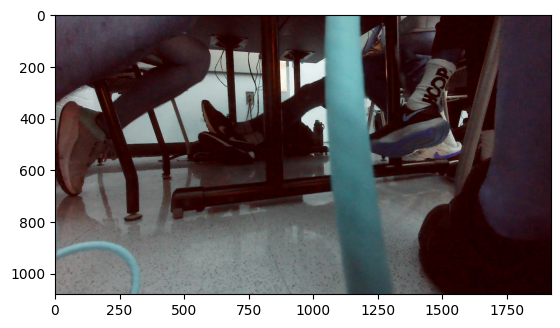

In [8]:
plt.imshow(frame)

In [2]:
color_img = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)

at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

tags = at_detector.detect(frame, estimate_tag_pose=False, camera_params=None, tag_size=None)

NameError: name 'frame' is not defined

In [ ]:
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))